In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Dataset


In [2]:
df=pd.read_csv("/content/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

From above results and also from the offical data description we can notice following things.


The dataset has the following features (columns):



* Pregnancies: Number of times pregnant

* Glucose: Plasma glucose concentration, 2 hours in an oral glucose tolerance test

* BloodPressure: Diastolic blood pressure ( mmHg )

* SkinThickness: Triceps skin fold thickness ( mm )

* Insulin: 2-Hour serum insulin ( mu(U/ml ))

* BMI: Body mass index (weight in kg / height in meter square )

* DiabetesPedigreeFunction: It indicates the function which scores likelihood of diabetes based on family history

* Age: Age (in years)

* Outcome: Whether patient is diagnosed with Diabetes (0 for No, 1 for Yes)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The features "Glucose," "Blood Pressure," "Skin Thickness," "Insulin," and "BMI" all have a minimum value of 0. This is illogical because these values can't be zero. Therefore, in our circumstance, this can be safely referred to as "missing data". The 0-valued rows must either be removed or replaced with the mean or median value for that feature.



In [8]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


There are no null values in our dataset. Let us move on to visualizing the dataset to gather more insights about the data.

# Data visualization

## Analysis of Pregnancies

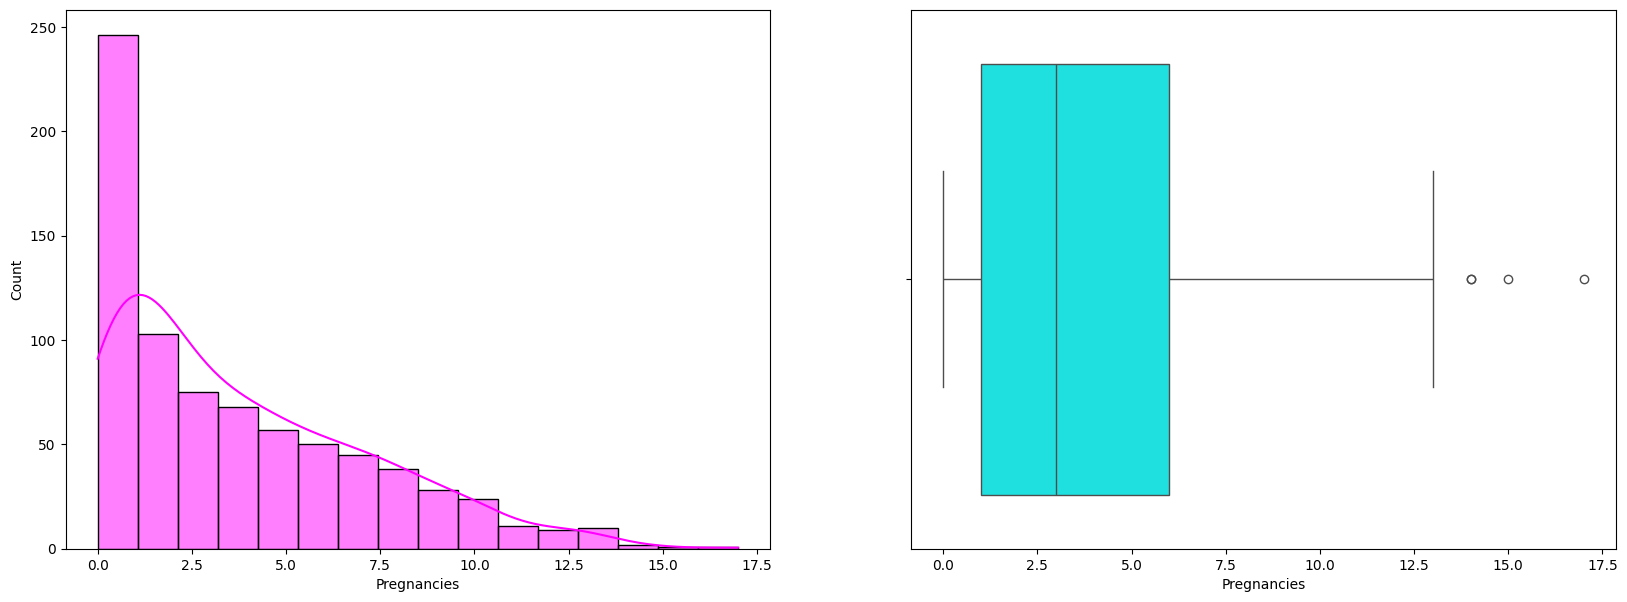

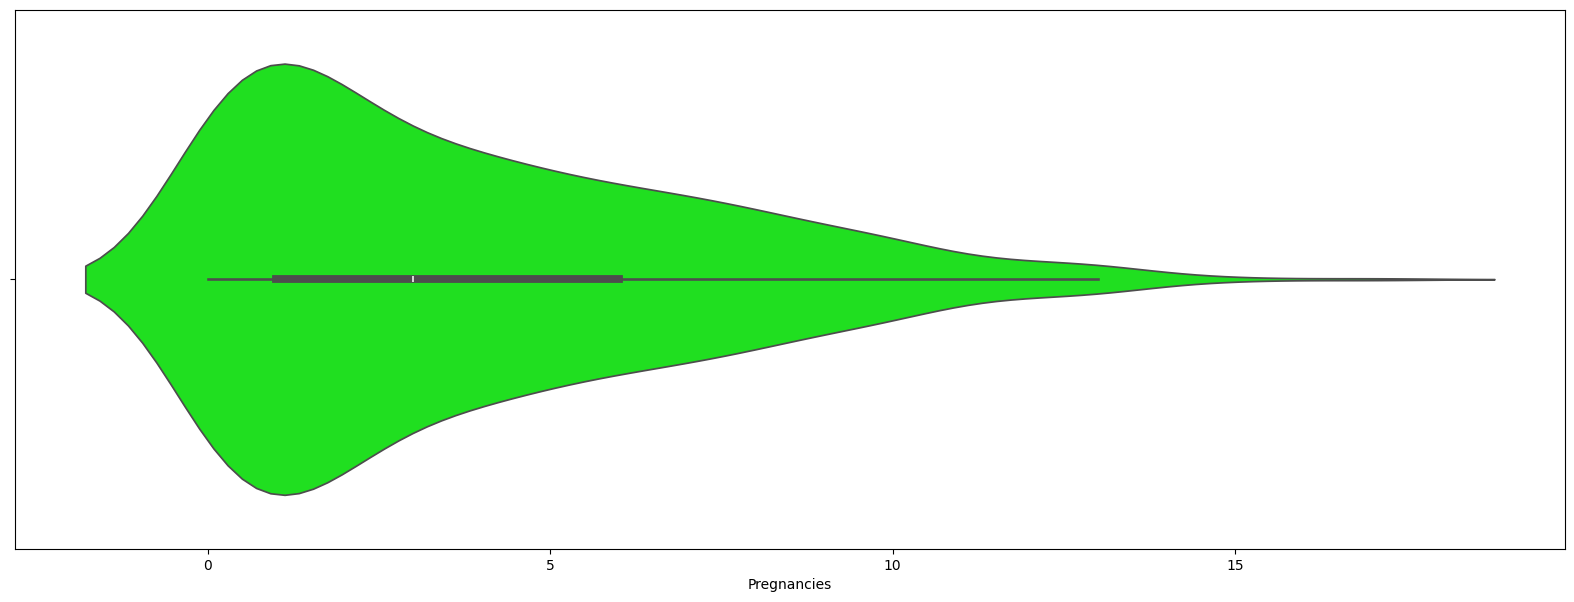

In [9]:

# Histogram , Boxplot and Violin plot
fig1, ax1 =plt.subplots(1,2,figsize=(20,7))
fig2, ax2 =plt.subplots(figsize=(20,7))

sns.histplot(data=df, x='Pregnancies', kde=True, ax=ax1[0], color='magenta')
sns.boxplot(data=df, x='Pregnancies', ax=ax1[1], color='aqua')

sns.violinplot(data=df, x='Pregnancies', ax=ax2, color='lime')

plt.show()

In [10]:
print("Median of Pregnancies: ",df['Pregnancies'].median())
print("Maximum of Pregnancies: ",df['Pregnancies'].max())

Median of Pregnancies:  3.0
Maximum of Pregnancies:  17


In [11]:
df['Pregnancies'].value_counts()

,count
Pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


From the above analysis we observe that:

* Most patients had 0, 1 or 2 pregnancies.
* Median value of Pregnancies is 3.
* Also, patients had upto 17 pregnancies!


## Analysis of Outcome

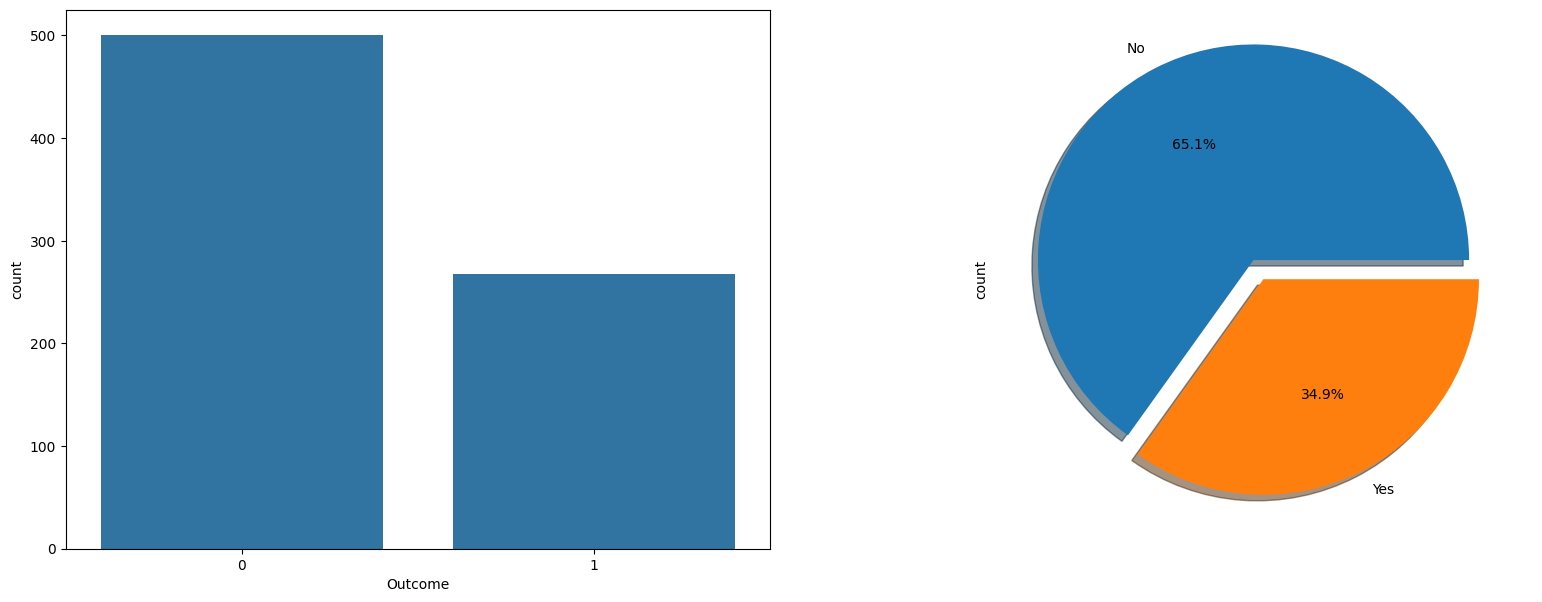

In [12]:

## plotting countplot and pie chart

fig,ax=plt.subplots(1,2,figsize=(20,7))

sns.countplot(data=df, x="Outcome", ax=ax[0])
df['Outcome'].value_counts().plot.pie(explode=[0.1,0],autopct='%1.1f%%', labels=['No','Yes'], shadow=True, ax=ax[1])

plt.show()

* 65.1% patients in the dataset do NOT have diabetes.
* 34.9% patients in the dataset has diabetes.

## Analysis of Glucose

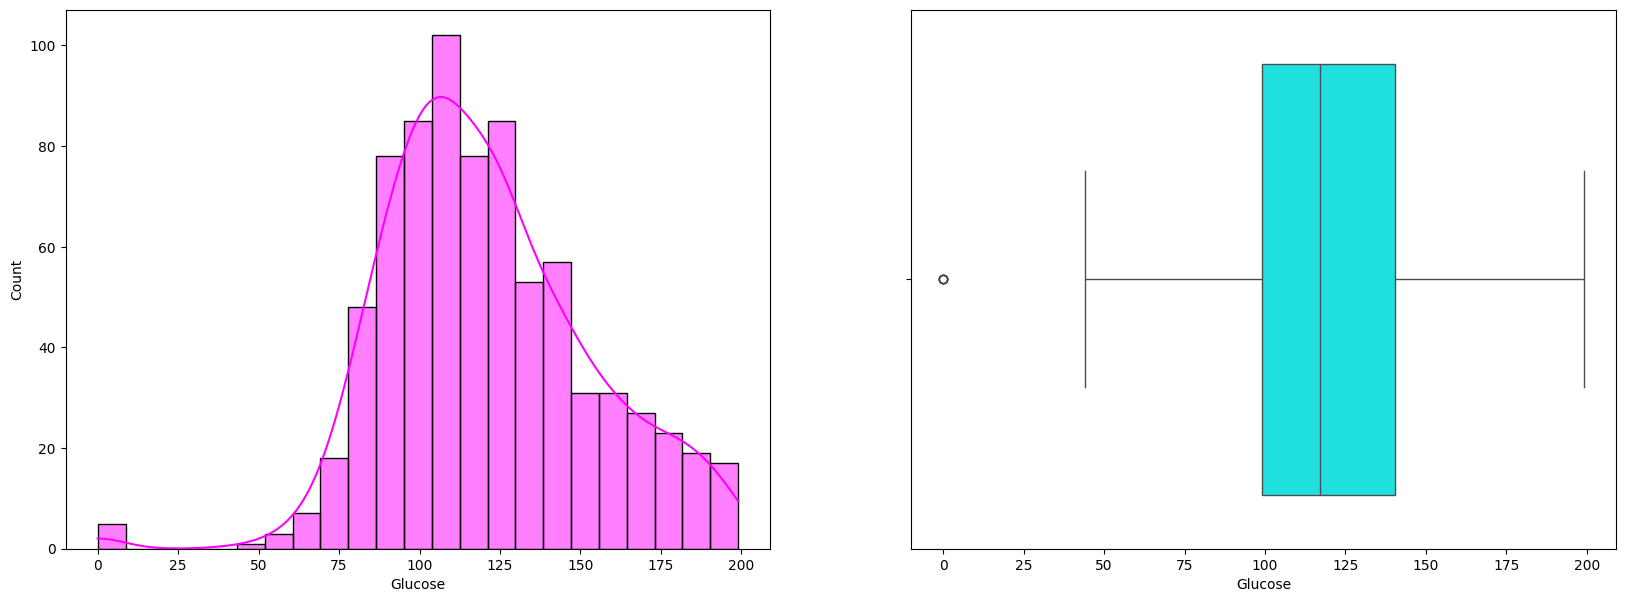

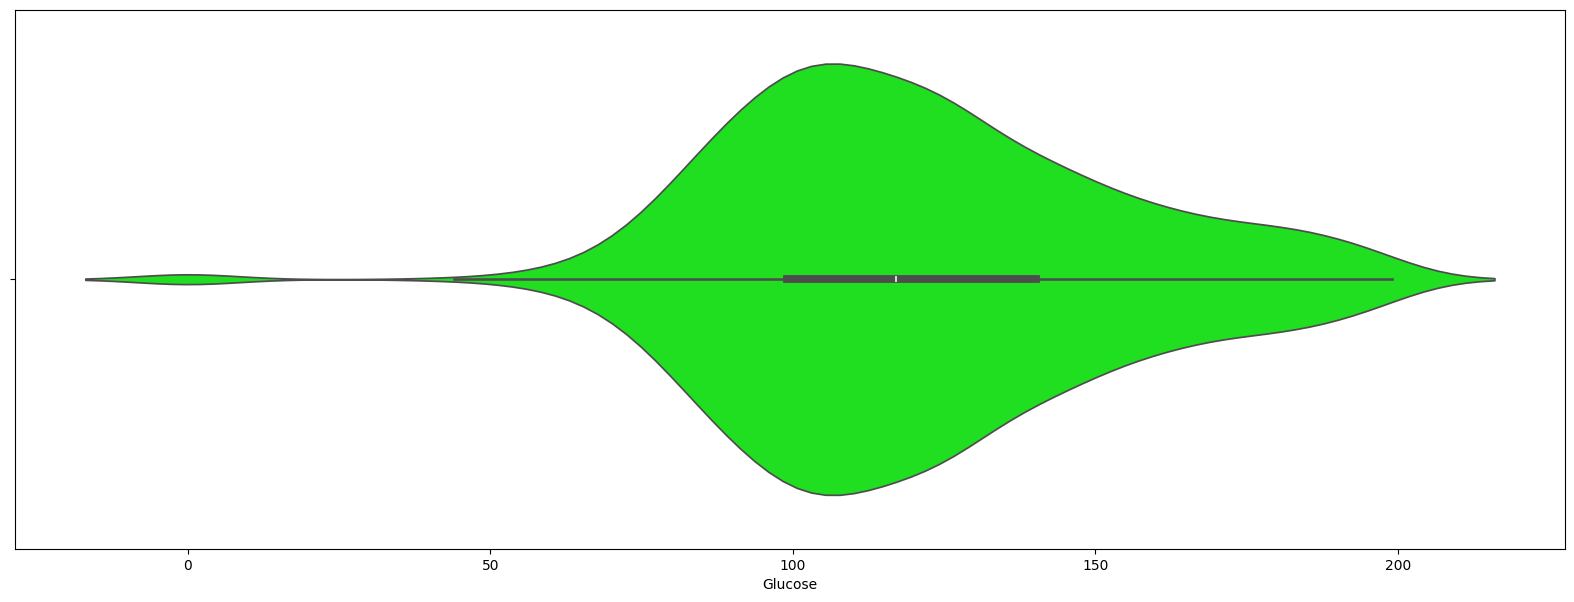

In [13]:

## plotting Histogram, Boxplot and Violin plot
fig3, ax3= plt.subplots(1,2,figsize=(20,7))
fig4, ax4= plt.subplots(figsize=(20,7))

sns.histplot(data=df, x="Glucose", kde=True, ax=ax3[0], color='magenta')
sns.boxplot(data=df, x="Glucose", ax=ax3[1], color='aqua')

sns.violinplot(data=df, x="Glucose", ax=ax4, color='lime')

plt.show()

In [14]:
print("Median of Glucose: ",df["Glucose"].median())
print("Maximum of Glucose: ",df["Glucose"].max())
print("Mean of Glucose: ",df["Glucose"].mean())

Median of Glucose:  117.0
Maximum of Glucose:  199
Mean of Glucose:  120.89453125


In [15]:
print("Rows with Glucose value of 0: ", df[df["Glucose"] == 0].shape[0])


Rows with Glucose value of 0:  5


* Median (117.0) and mean (120.8) of Glucose lie very close to each other i.e. the distribution is more or less symmetric and uniform.
* As seen from the box plot, an outlier lies on 0-value, which I talked about earlier.
* There are 5 rows with Glucose value as 0. This is not logical, so we need to keep this in mind.

## Analysis of Blood Pressure

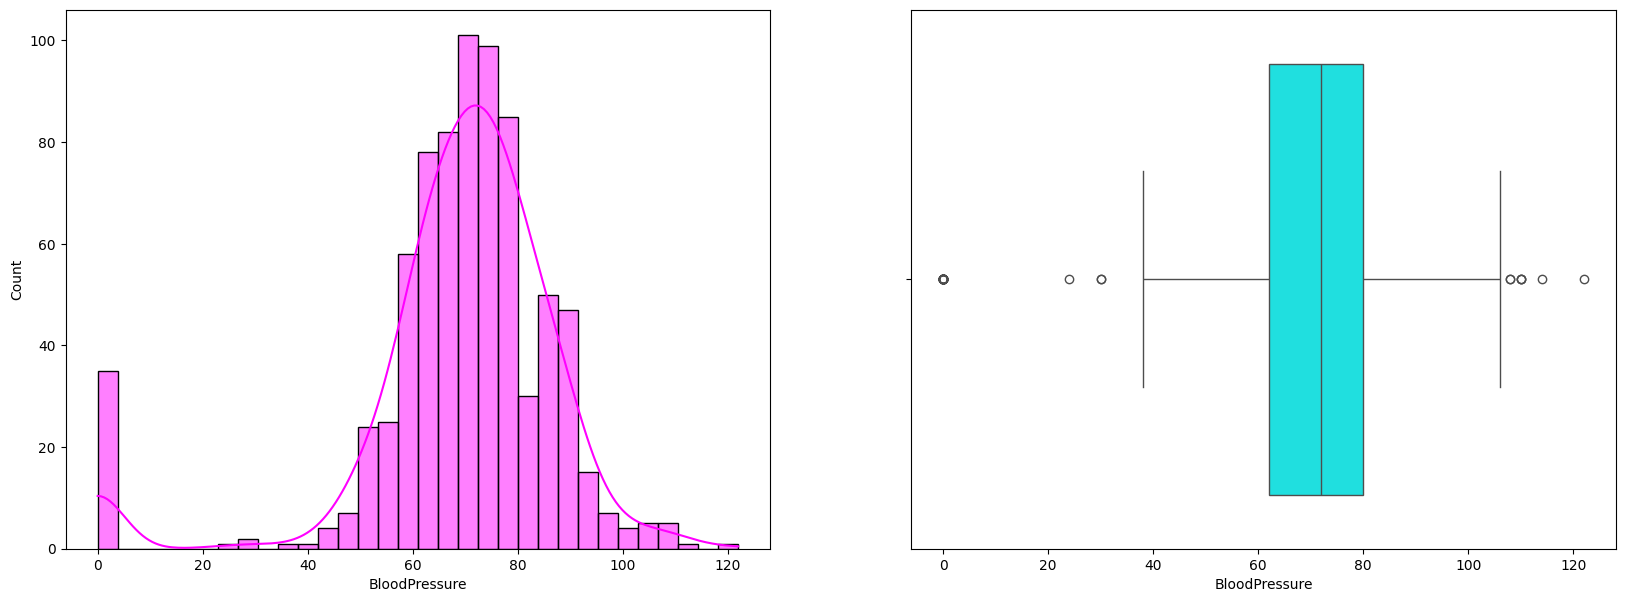

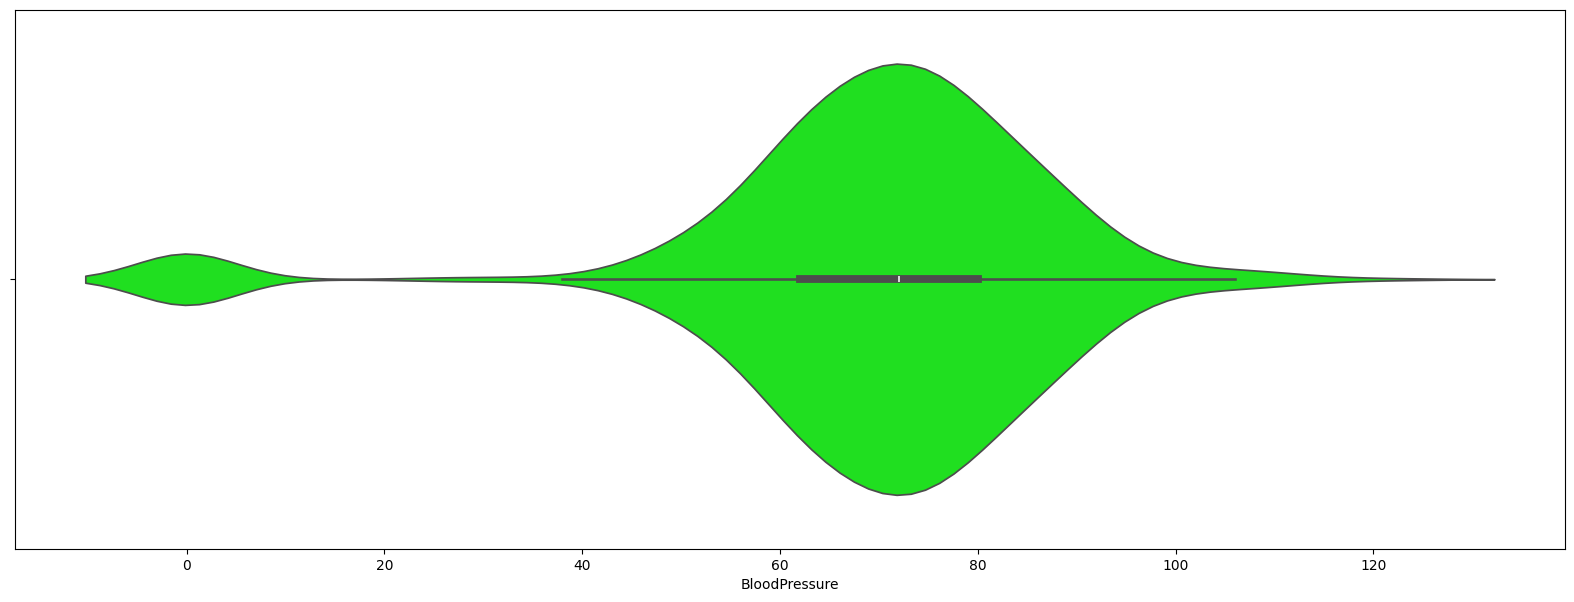

In [16]:

## plotting Histogram , Boxplot and Violin plots

fig5, ax5=plt.subplots(1,2,figsize=(20,7))
fig6, ax6=plt.subplots(figsize=(20,7))

sns.histplot(data=df, x='BloodPressure', kde=True, ax=ax5[0],color='magenta')
sns.boxplot(data=df, x="BloodPressure", ax=ax5[1], color='aqua')

sns.violinplot(data=df, x="BloodPressure", ax=ax6, color='lime')

plt.show()

In [17]:
print("Median of Blood Pressure: ",df["BloodPressure"].median())
print("Maximum of Blood Pressure: ",df["BloodPressure"].max())
print("Mean of Blood Pressure: ",df["BloodPressure"].mean())

Median of Blood Pressure:  72.0
Maximum of Blood Pressure:  122
Mean of Blood Pressure:  69.10546875


In [18]:
print("Rows with BloodPressure value of 0: ", df[df["BloodPressure"] == 0].shape[0])


Rows with BloodPressure value of 0:  35


* Median (72.0) and mean (69.1) of BloodPressure lie very close to each other i.e. the distribution is more or less symmetric and uniform.
* As seen from the box plot and violin plot, some outliers lie on 0-value, which I talked about earlier.
* There are 35 rows with BloodPressure value as 0. This is not logical.

## Analysis of Insulin

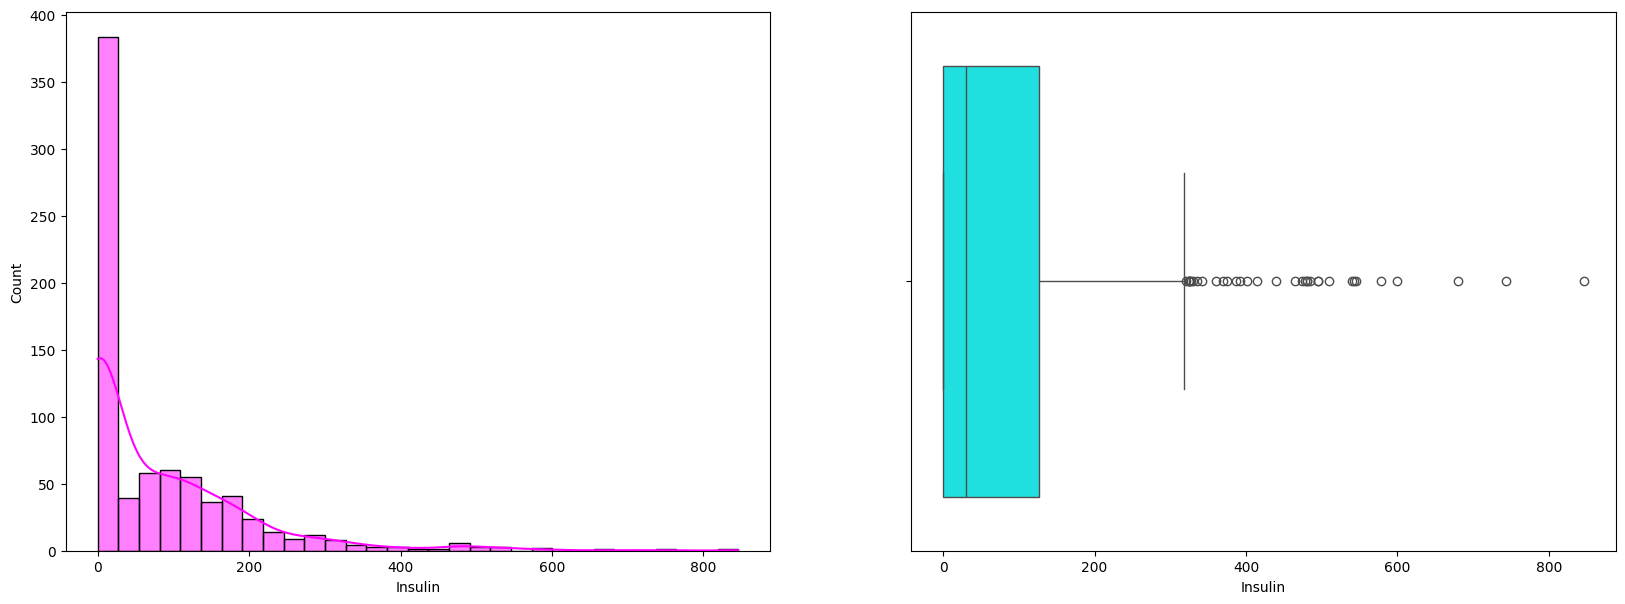

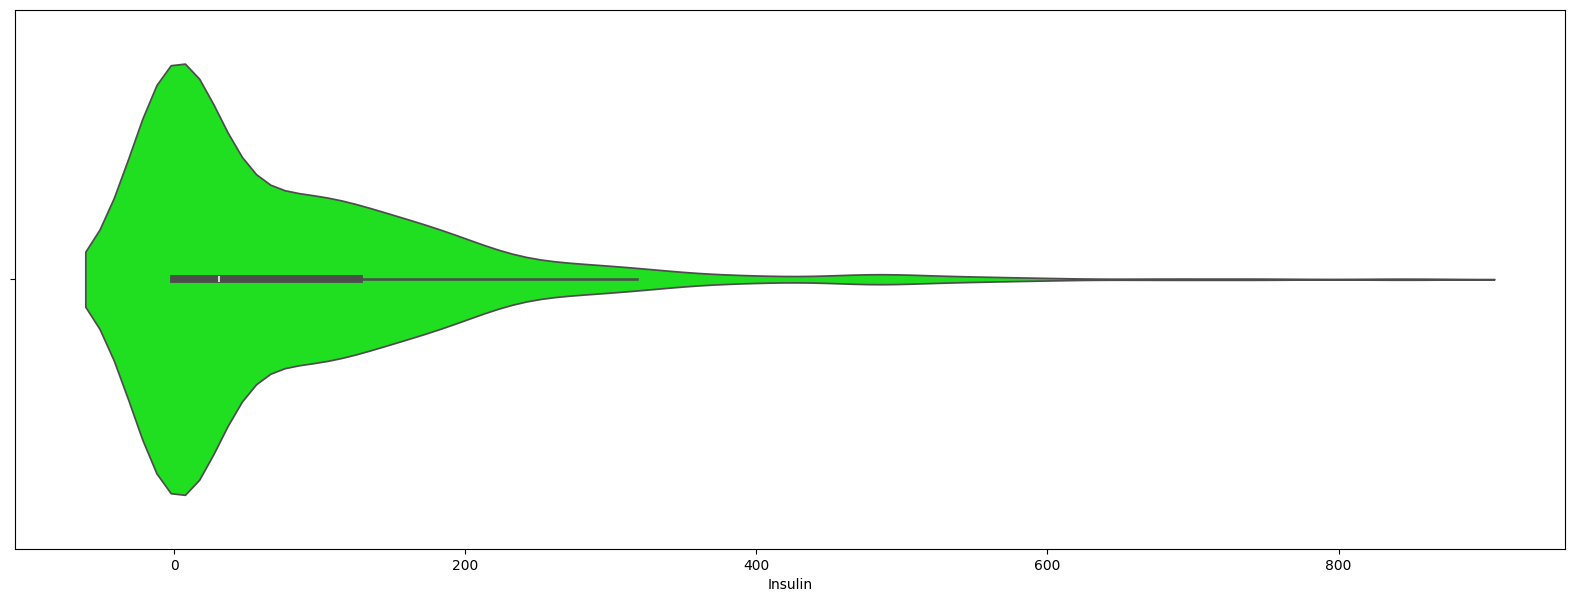

In [19]:

## plotting Histogram , Boxplot and Viloin plot

fig7, ax7=plt.subplots(1,2,figsize=(20,7))
fig8, ax8=plt.subplots(figsize=(20,7))

sns.histplot(data=df, x="Insulin", kde=True, ax=ax7[0], color='magenta')
sns.boxplot(data=df, x="Insulin", ax=ax7[1],color='aqua')

sns.violinplot(data=df, x="Insulin", ax=ax8, color="lime")

plt.show()

In [20]:
print("Rows with Insulin value of 0: ", df[df["Insulin"] == 0].shape[0])


Rows with Insulin value of 0:  374


The plots for Insulin are highly skewed. Also, the 0-value logical error is the most for this feature. 374 out of 768 instances have value of Insulin as 0.

## Analysis of BMI

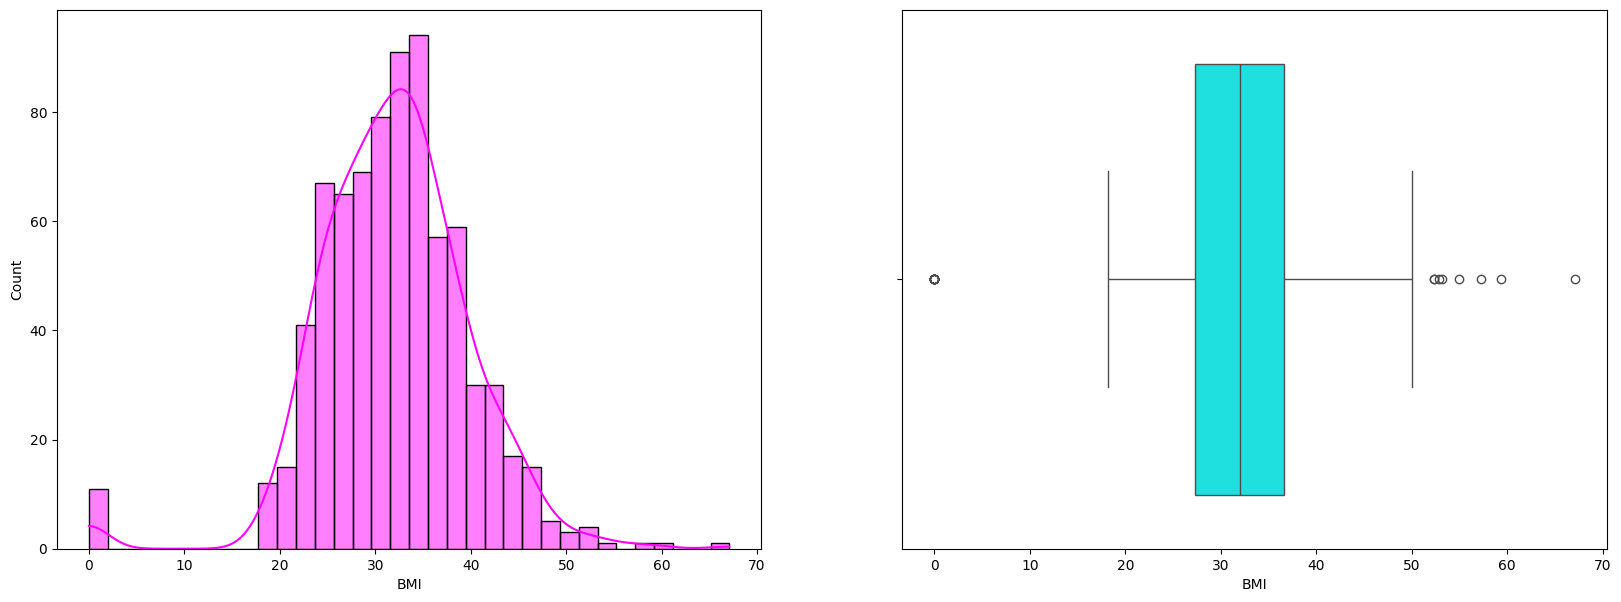

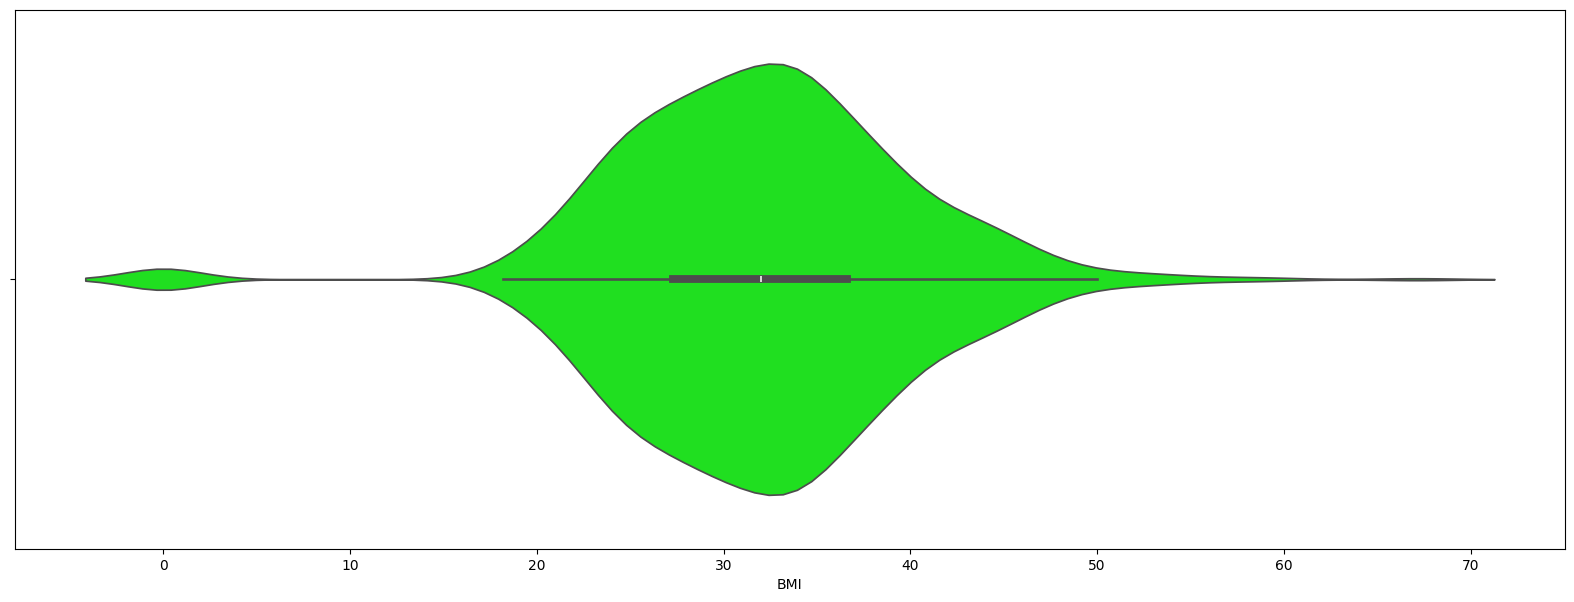

In [21]:

## plotting Histogram, Boxplot and Viloin plot

fig9 , ax9=plt.subplots(1,2, figsize=(20,7))
fig10, ax10=plt.subplots(figsize=(20,7))

sns.histplot(data=df, x="BMI", kde=True, ax=ax9[0], color='magenta')
sns.boxplot(data=df, x="BMI", ax=ax9[1], color='aqua')

sns.violinplot(data=df, x="BMI", ax=ax10, color='lime')

plt.show()

In [22]:
print("Median of BMI: ",df["BMI"].median())
print("Maximum of BMI: ",df["BMI"].max())
print("Mean of BMI: ",df["BMI"].mean())

Median of BMI:  32.0
Maximum of BMI:  67.1
Mean of BMI:  31.992578124999998


In [23]:
print("Rows with BMI value of 0: ", df[df["BMI"] == 0].shape[0])


Rows with BMI value of 0:  11


* Median (32.0) and Mean (31.9) of BMI are very close to each other. Thus, the distribution is more or less symmetric and uniform
* Maximum BMI is 67.1
* There are 11 rows with BMI value as 0

## Analysis of Diabetes Pedigree Function

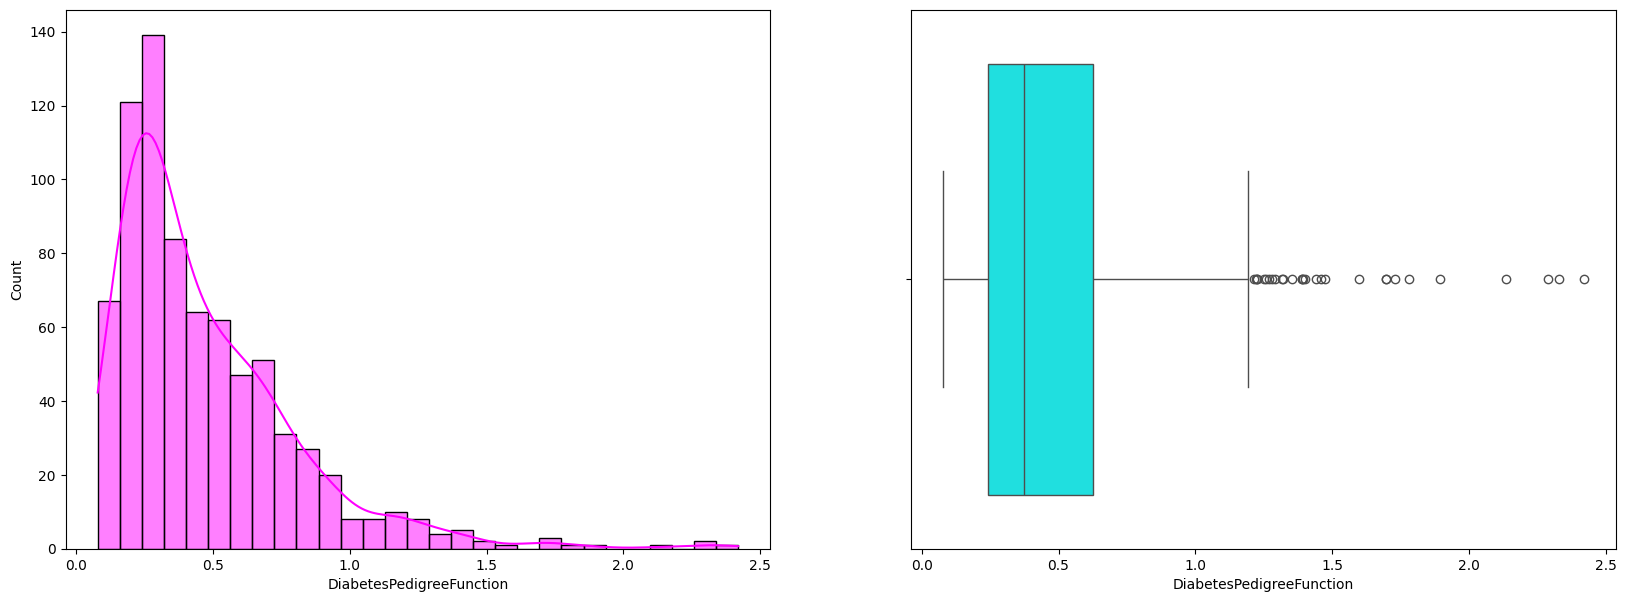

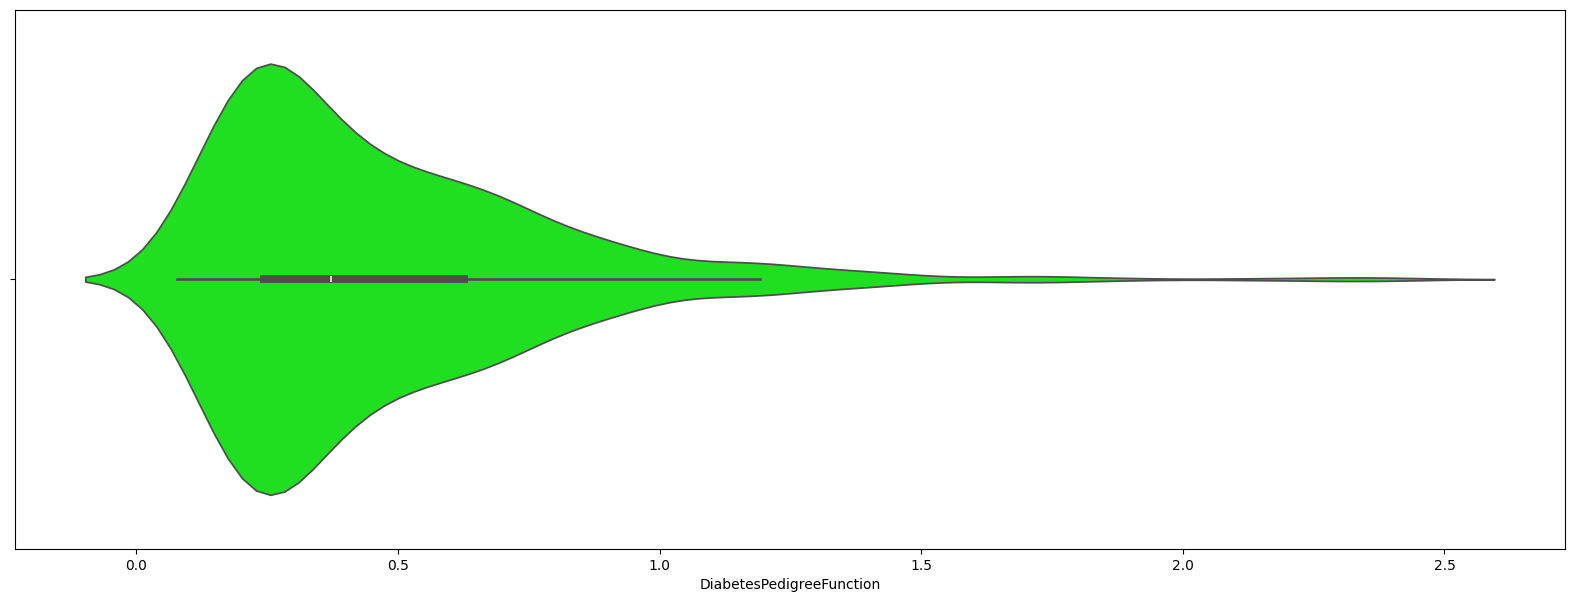

In [24]:

## Plottng Histogram , Boxplot and Violin plot

fig11, ax11=plt.subplots(1,2,figsize=(20,7))
fig12, ax12=plt.subplots(figsize=(20,7))

sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, ax=ax11[0], color='magenta')
sns.boxplot(data=df, x="DiabetesPedigreeFunction", ax=ax11[1],color='aqua')

sns.violinplot(data=df, x="DiabetesPedigreeFunction", ax=ax12,color = 'lime')
plt.show()

In [25]:
print("Median of DiabetesPedigreeFunction: ",df["DiabetesPedigreeFunction"].median())
print("Maximum of DiabetesPedigreeFunction: ",df["DiabetesPedigreeFunction"].max())
print("Mean of DiabetesPedigreeFunction: ",df["DiabetesPedigreeFunction"].mean())

Median of DiabetesPedigreeFunction:  0.3725
Maximum of DiabetesPedigreeFunction:  2.42
Mean of DiabetesPedigreeFunction:  0.47187630208333325


* The histogram is higly skewed on the left side.
* There are many outliers in the Box plot.
* Violin plot distribution is dense in the interval 0.0 - 1.0

## Analysis of Age

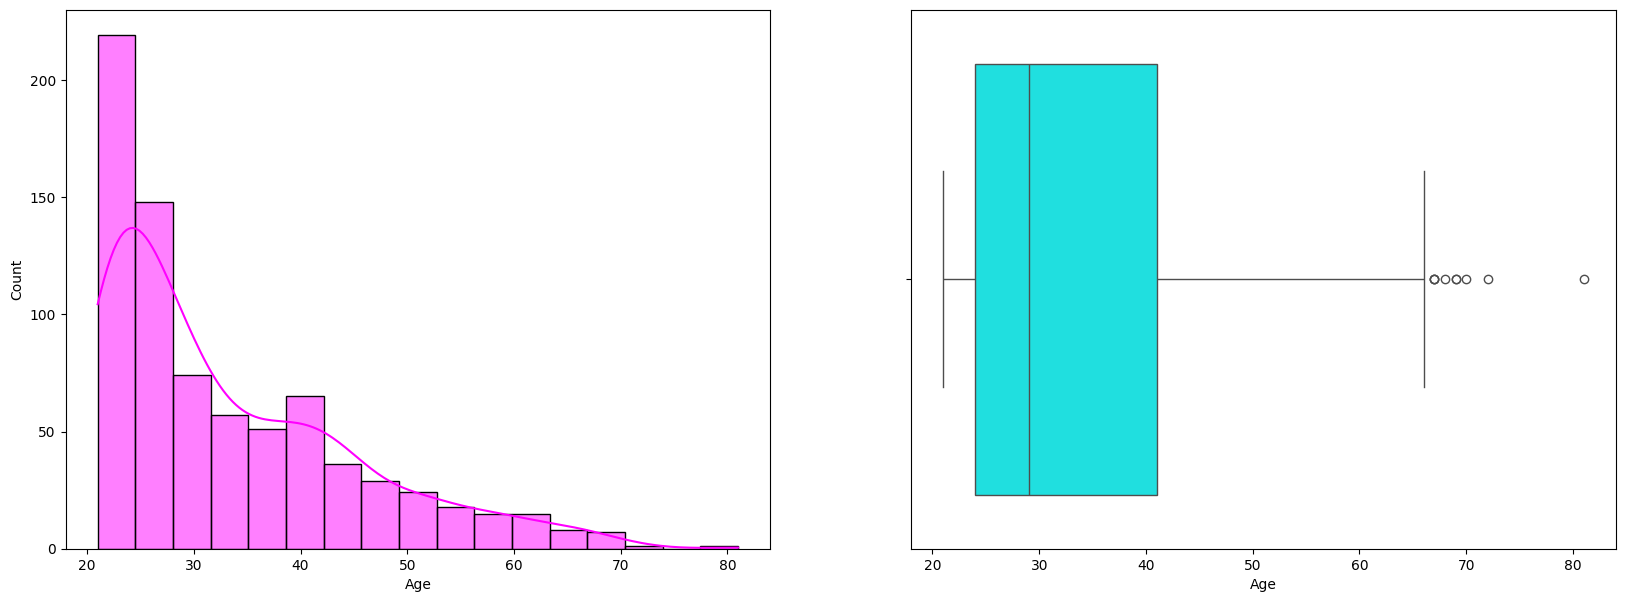

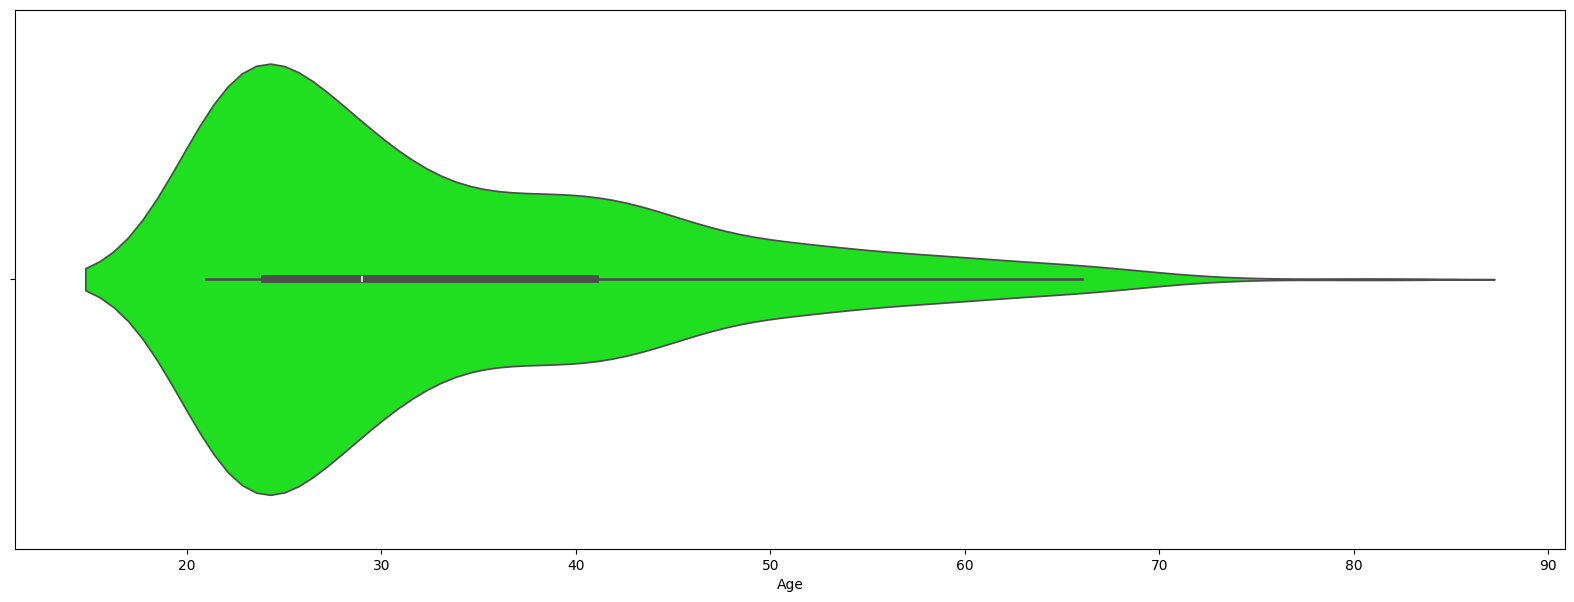

In [26]:

## plotting Histogram , Boxplot and Viloin plot
fig13, ax13=plt.subplots(1,2,figsize=(20,7))
fig14, ax14=plt.subplots(figsize=(20,7))

sns.histplot(data=df, x="Age", kde=True, ax=ax13[0], color='magenta')
sns.boxplot(data=df, x="Age", ax=ax13[1], color='aqua')

sns.violinplot(data=df, x="Age", ax=ax14,color="lime")

plt.show()

In [27]:
print("Median of Age: ",df["Age"].median())
print("Maximum of Age: ",df['Age'].max())
print("Mean of Age: ",df["Age"].mean())

Median of Age:  29.0
Maximum of Age:  81
Mean of Age:  33.240885416666664


* The distribution of Age is skewed on the left side.
* There are some outliers in the Box plot for Age.

## Multivariate Analysis

## Analysis of Glucose and outcome

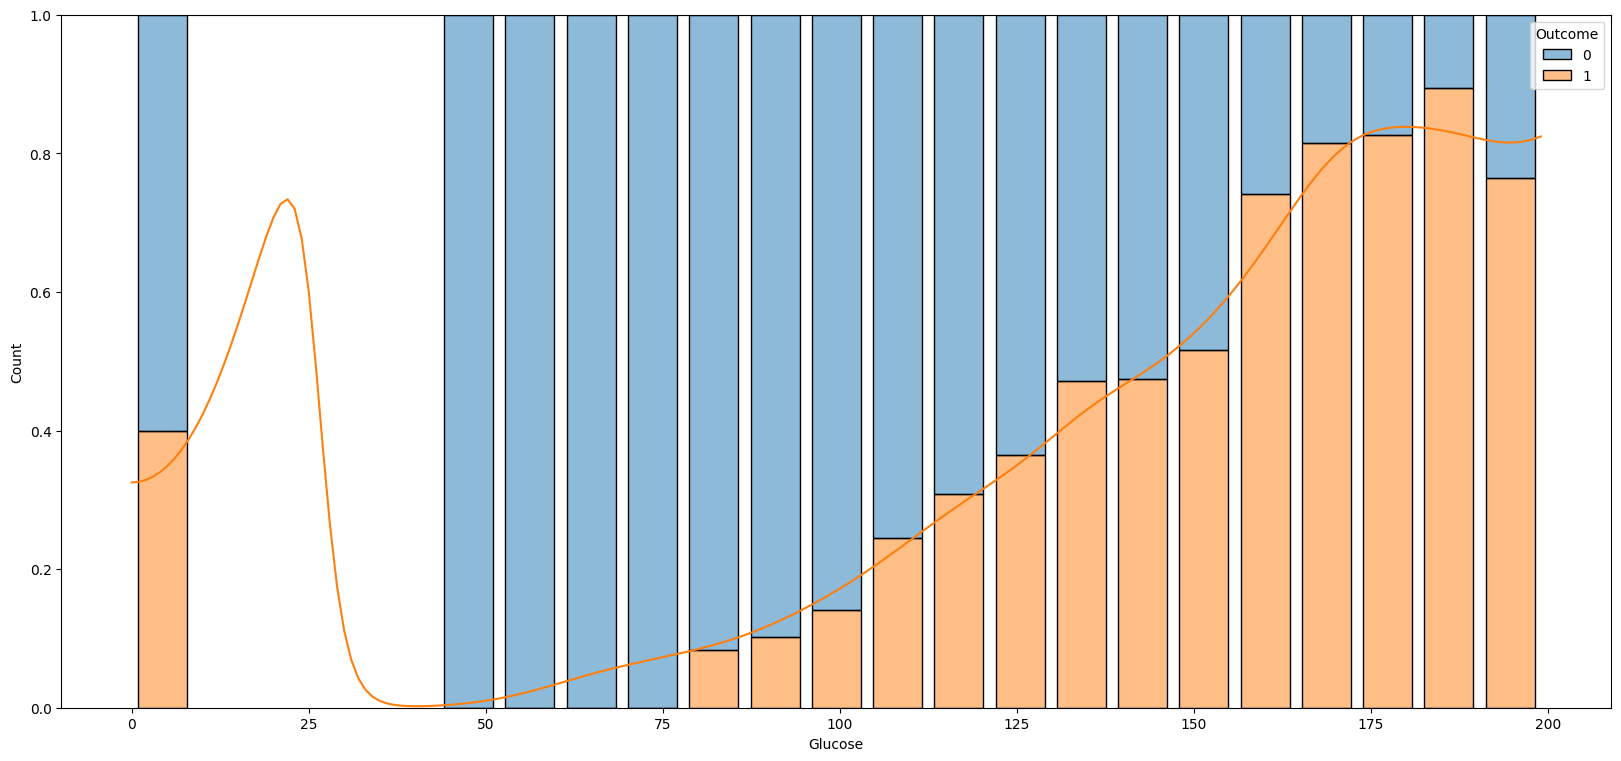

In [28]:

## plotting histogram

fig15,ax15=plt.subplots(figsize=(20,9))

sns.histplot(data=df, x="Glucose", hue="Outcome", shrink=0.8, multiple='fill', kde=True, ax=ax15)
plt.show()


From the above plot, we see a positive linear correlation.

* As the value of Glucose increases, the count of patients having diabetes increases i.e. value of Outcome as 1, increases.
* Also, after the Glucose value of 125, there is a steady increase in the number of patients having Outcome of 1.
* Note, when Glucose value is 0, it means the measurement is missing. We need to fill that values with the mean or median and then it will make sense.

So, there is a significant amount of positive linear correlation.

## Analysis of BloodPressure and outcome

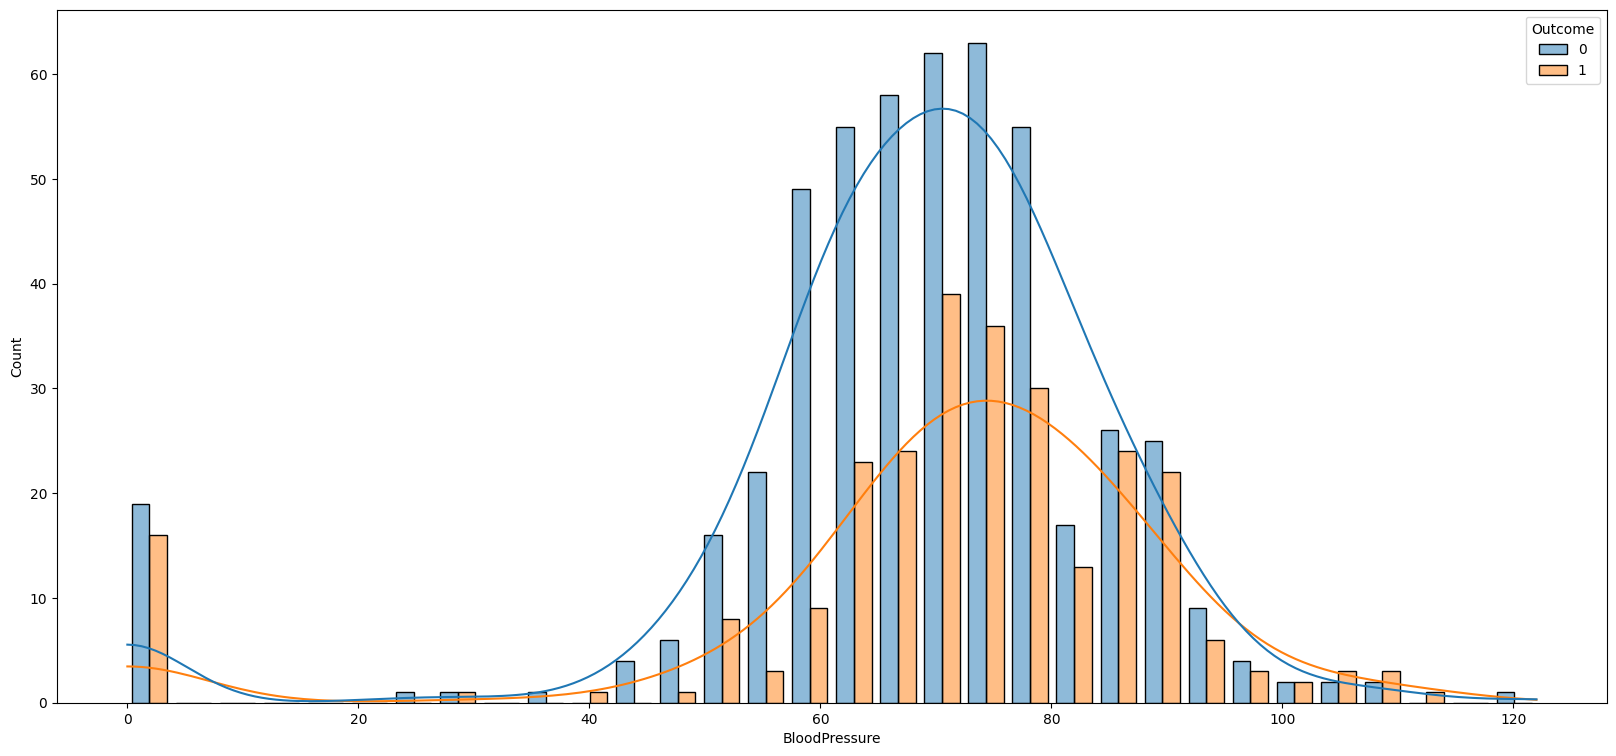

In [29]:
fig16,ax16=plt.subplots(figsize=(20,9))

sns.histplot(data=df,x="BloodPressure", hue="Outcome", shrink=0.8, multiple="dodge", kde=True, ax=ax16)
plt.show()


We observe that, Outcome and BloodPressure do NOT have a positive or negative linear correlation. The value of Outcome do not increase linearly as value of BloodPressure increases.

However, for BloodPressure values greater than 82, count of patients with Outcome as 1, is more.

## Analysis of BMI and Outcome

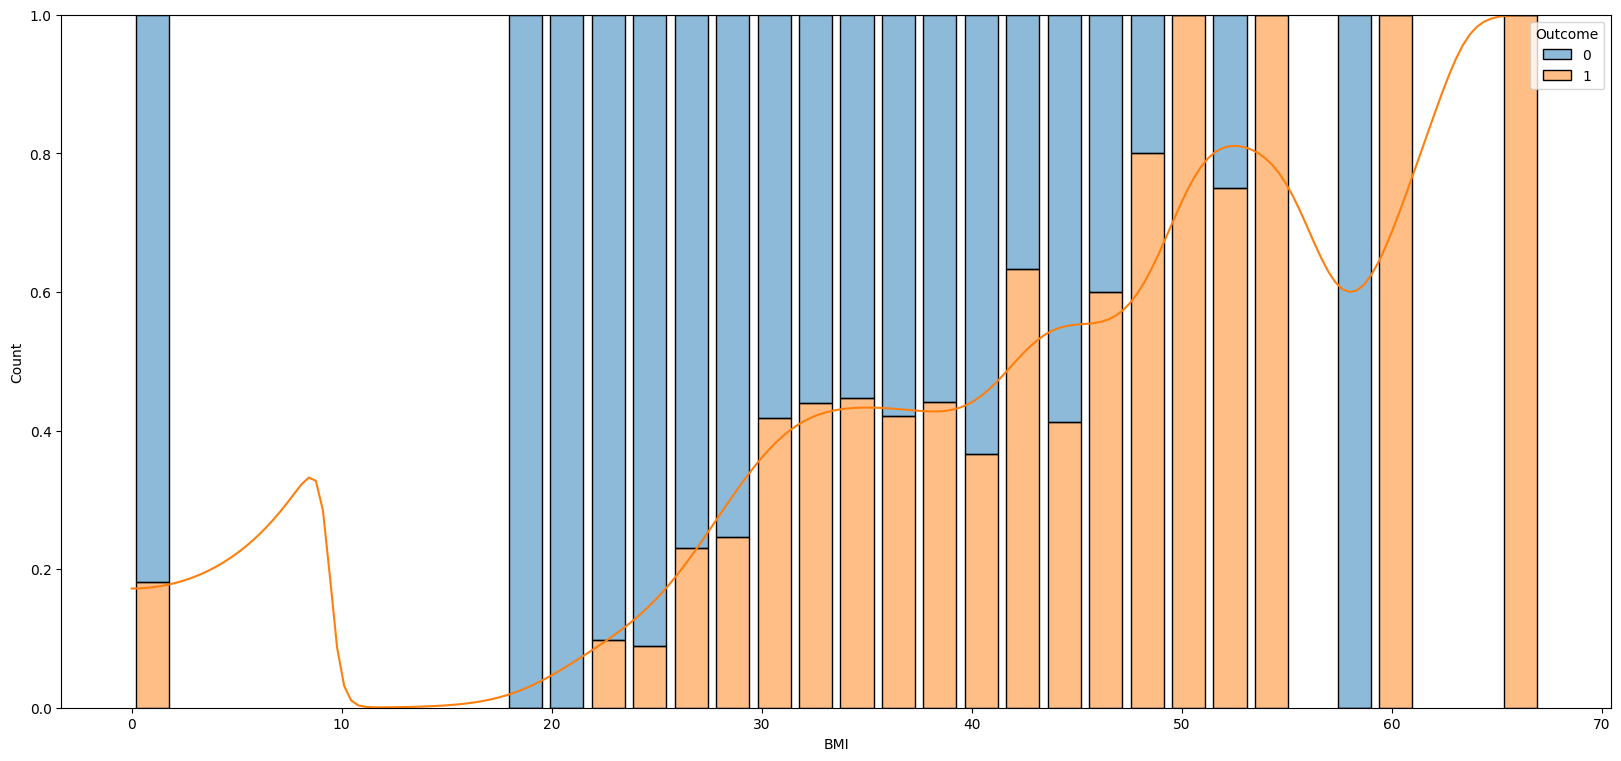

In [30]:
fig17,ax17 = plt.subplots(figsize=(20,9))

sns.histplot(data=df, x="BMI", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax17)
plt.show()


From the above plot, a positive linear correlation is evident for BMI.

## Analysis of Age and Outcome

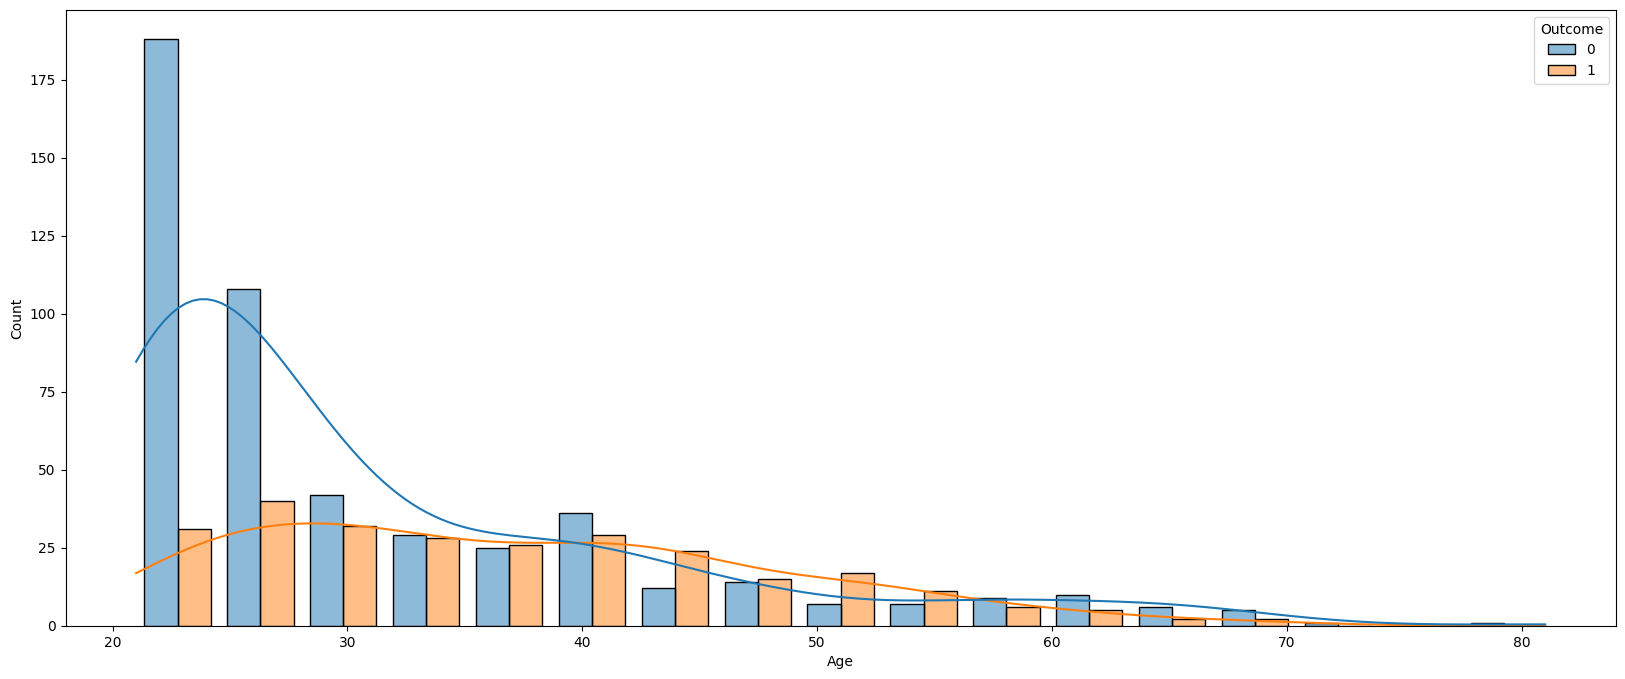

In [31]:
fig18, ax18=plt.subplots(figsize=(20,8))

sns.histplot(data=df, x="Age", hue="Outcome", shrink=0.8, multiple="dodge", kde=True, ax=ax18)
plt.show()


For Age greater than 35 years, the chances of patients having diabetes increases as evident from the plot i.e. The number of patients having diabetes is more than the number of people NOT having diabetes. But, it does not hold true for ages like 60+, somehow.

There is some positive linear correlation though.

## Analysis of Pregnancies and Outcome

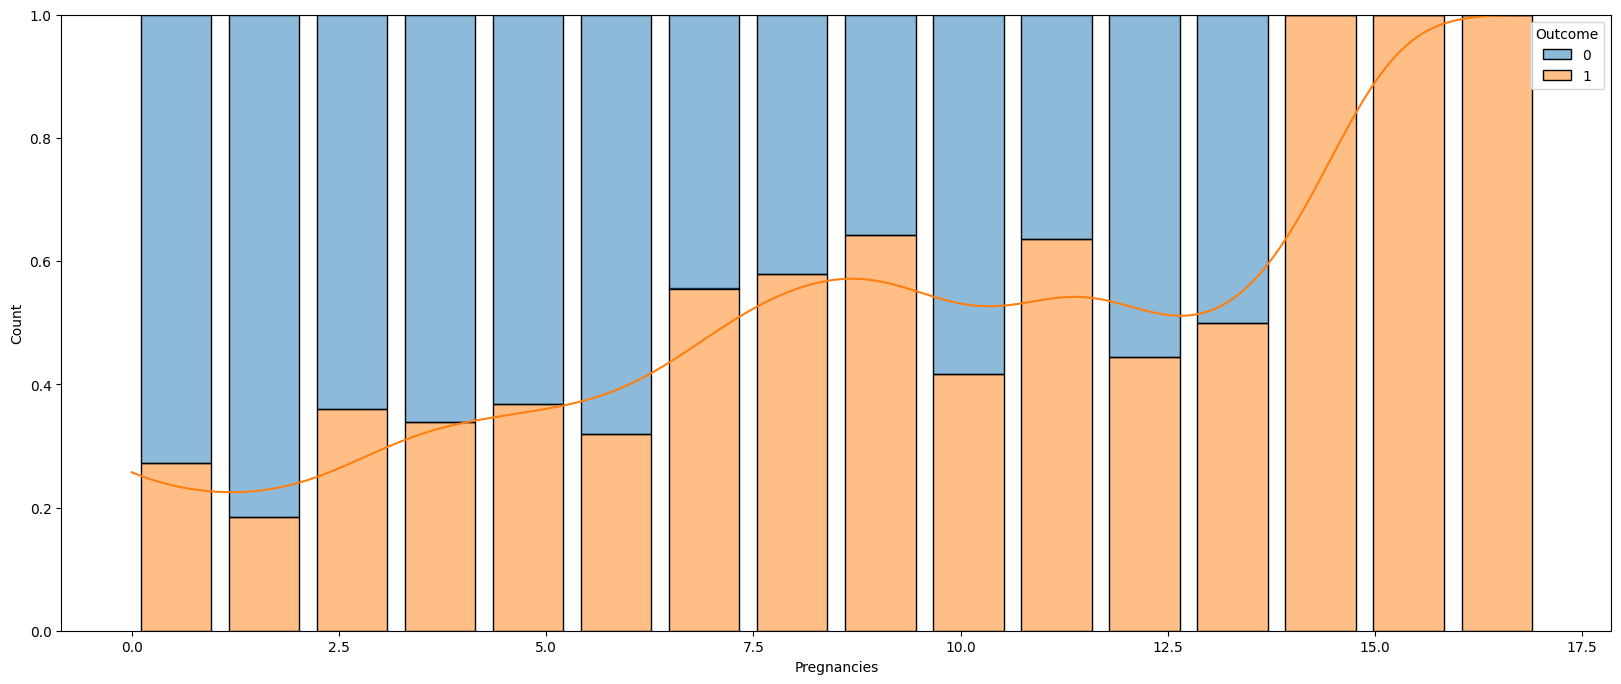

In [32]:
fig19, ax19=plt.subplots(figsize=(20,8))

sns.histplot(data=df, x="Pregnancies", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax19)
plt.show()


There is some positive linear correlation of Pregnancies with Outcome.

## Analysis Correlations

In [33]:
## The 2D correlation matrix
corr_matrix =df.corr()

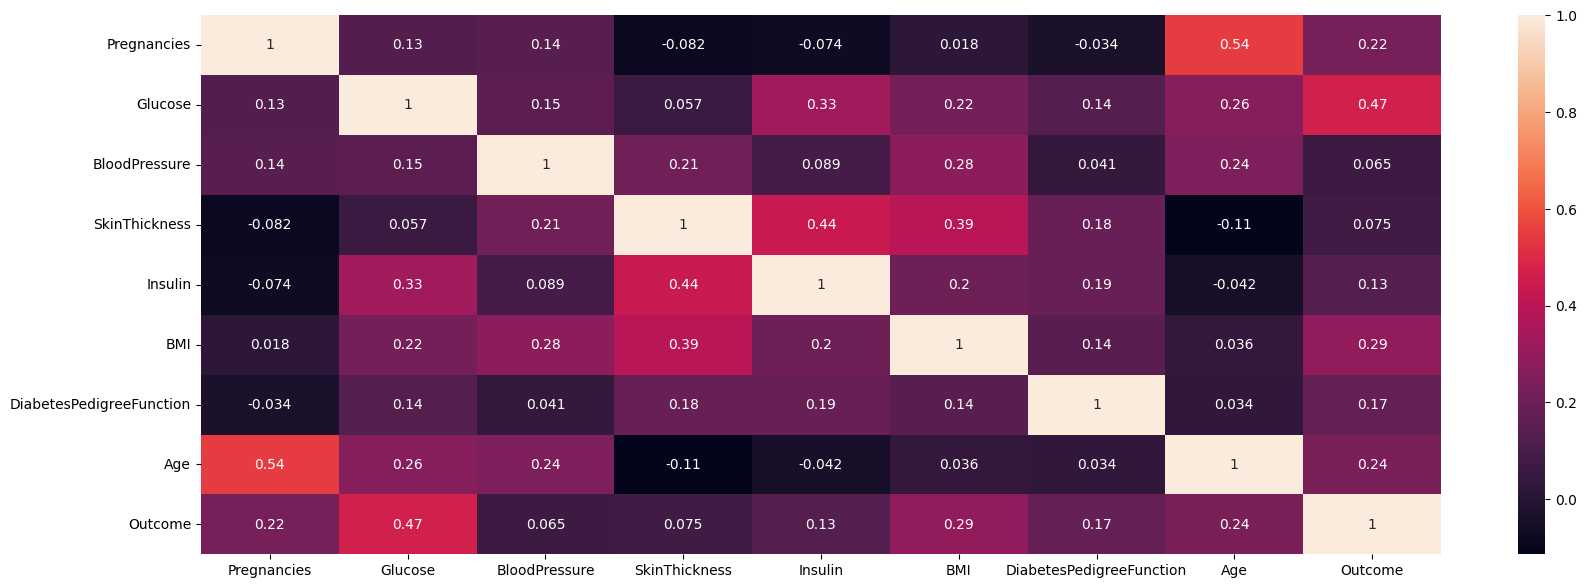

In [34]:
## Plotting the heatmap of corr

fig20, ax20=plt.subplots(figsize=(20,7))

dataplot=sns.heatmap(data=corr_matrix, annot=True, ax=ax20)
plt.show()

In [35]:
corr_matrix["Outcome"].sort_values(ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068



We observe that:

* Glucose has the maximum positive linear correlation with Outcome, which is logical.
* BloodPressure has the lowest positive linear correlation with Outcome.
* No feature has a negative linear correlation with Outcome.

# Filling the Missing values

We will replace the 0-values of the following columns with their median values:

In [36]:
df1=df.copy()

df1["Glucose"]=df["Glucose"].replace(0,df["Glucose"].median())
df1["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].median())
df1["SkinThickness"]=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df1["Insulin"]=df["Insulin"].replace(0,df["Insulin"].median())
df1["BMI"]=df["BMI"].replace(0,df["BMI"].median())

In [37]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
df1.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Now there are no null values

# Spliting the data ,testing different algorithms and storing their accuracy

In [40]:
# importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
# split features and target
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [42]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [43]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [44]:
## Train-Test split (80% train , 20% test)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [46]:
## Dictionary to store accuracy results
accuracy_results={}

In [47]:
## 1. Logistic Regression
lr= LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
accuracy_results["Logistic Regression"]=accuracy_score(y_test,lr_pred)

In [54]:
accuracy_results["Logistic Regression"]

0.7467532467532467

In [57]:
## 2. K-Nearest Neighbors
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
accuracy_results["KNN"]=accuracy_score(y_test,knn_pred)

In [58]:
accuracy_results["KNN"]

0.6623376623376623

In [59]:
## 3. Decision Tree
dt= DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
accuracy_results["Decision Tree"]=accuracy_score(y_test,dt_pred)

In [60]:
accuracy_results["Decision Tree"]

0.7467532467532467

In [61]:
## 4. Random Forest
rf= RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
accuracy_results["Random Forest"]=accuracy_score(y_test,rf_pred)

In [62]:
accuracy_results["Random Forest"]

0.7207792207792207

In [63]:
# Baseline accuracy results
for model,acc in accuracy_results.items():
  print(f"{model} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.7468
Decision Tree Accuracy: 0.7468
KNN Accuracy: 0.6623
Random Forest Accuracy: 0.7208


The above models were trained as baseline classifiers to evaluate initial performance on the dataset. These accuracy values will be further improved through data preprocessing, feature engineering, and hyperparameter tuning.

# Feature Engineering

In [64]:
# importing required libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [65]:
# MinMax Scaling
minmax=MinMaxScaler()

In [66]:
x_train_mm=minmax.fit_transform(x_train)
x_test_mm=minmax.transform(x_test)

In [67]:
lr_mm=LogisticRegression(max_iter=1000)
lr_mm.fit(x_train_mm,y_train)
pred_mm=lr_mm.predict(x_test_mm)

In [68]:
minmax_accuracy=accuracy_score(y_test,pred_mm)

In [69]:
minmax_accuracy

0.7532467532467533

In [71]:
## Standard Scaling
standard=StandardScaler()
x_train_std=standard.fit_transform(x_train)
x_test_std=standard.transform(x_test)

In [73]:
lr_std=LogisticRegression(max_iter=1000)
lr_std.fit(x_train_std,y_train)
pred_std=lr_std.predict(x_test_std)

In [74]:
standard_accuracy = accuracy_score(y_test,pred_std)

In [75]:
print("MinMax Scaler Accuracy: ",minmax_accuracy)
print("Standard Scaler Accuracy: ", standard_accuracy)

MinMax Scaler Accuracy:  0.7532467532467533
Standard Scaler Accuracy:  0.7532467532467533


Selecting Top Features

In [77]:
selected_features=["Glucose","BMI","Age","Insulin","DiabetesPedigreeFunction"]

x_selected=df[selected_features]
y=df["Outcome"]

**Glucose:** Primary indicator of blood sugar level and strongest predictor of diabetes

**BMI:** Reflects obesity, a major diabetes risk factor

**Age:** Risk increases with age

**Insulin:** Indicates insulin resistance

**DiabetesPedigreeFunction:** Captures genetic influence

# Remove Outliers and re-check accuracy

In [78]:
# Removing outliers using IQR method
Q1= x_selected.quantile(0.25)
Q3= x_selected.quantile(0.75)
IQR=Q3-Q1

In [80]:
x_no_outliers=x_selected[~((x_selected<(Q1-1.5*IQR)) | (x_selected>(Q3+1.5*IQR))).any(axis=1)]

In [81]:
y_no_outliers=y.loc[x_no_outliers.index]

In [82]:
# Train-test split after outlier removal
x_train,x_test,y_train,y_test=train_test_split(x_no_outliers,y_no_outliers,test_size=0.2,random_state=42)

In [83]:
# Standard Scaling
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [84]:
# Model
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

In [85]:
outlier_removed_accuracy=accuracy_score(y_test,rf_pred)
print("Accuracy after removing outliers: ",outlier_removed_accuracy)

Accuracy after removing outliers:  0.7426470588235294


Feature engineering significantly improved model performance by scaling features, selecting relevant medical indicators, and removing outliers, leading to improved classification accuracy.